In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# Import other libraries as it is required

In [6]:
 # Load the dataset

data = pd.read_csv("creditcard.csv")
# num_rows = data.shape[0]
# print("Number of Rows in the Dataset:", num_rows)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

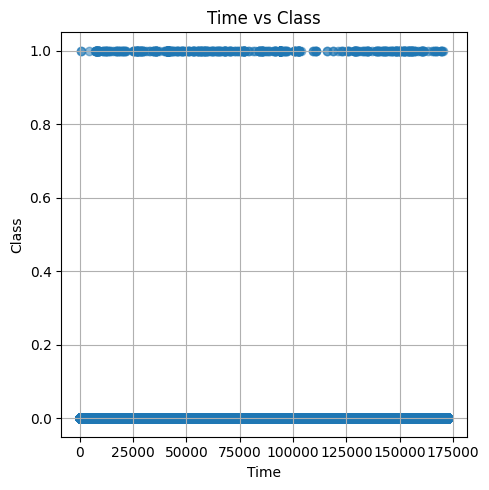

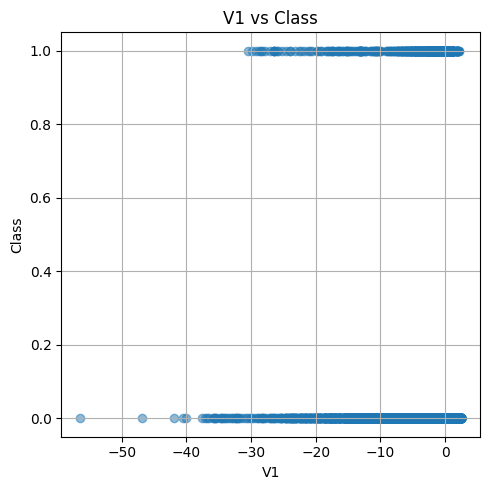

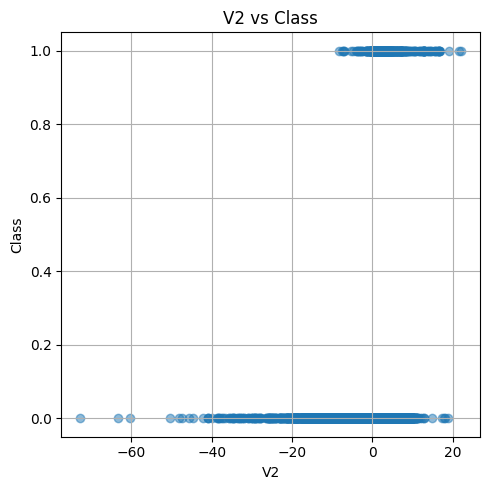

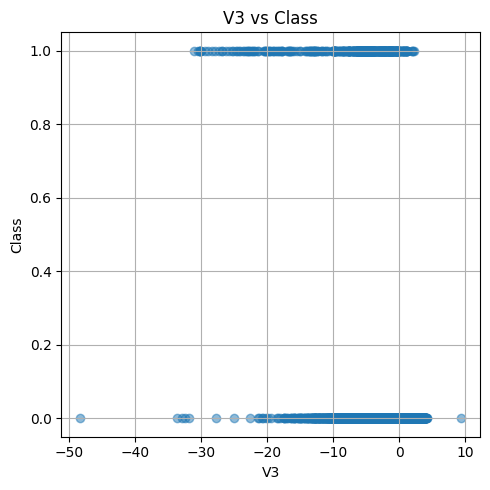

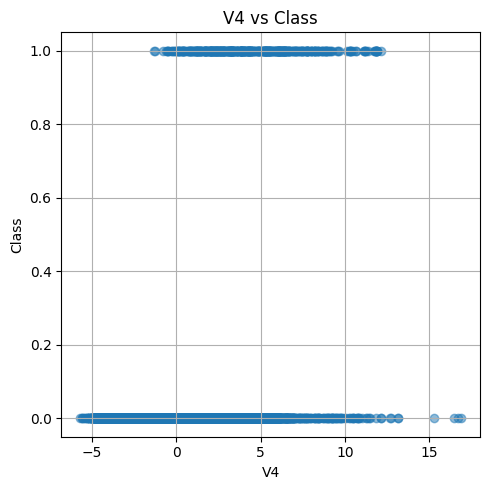

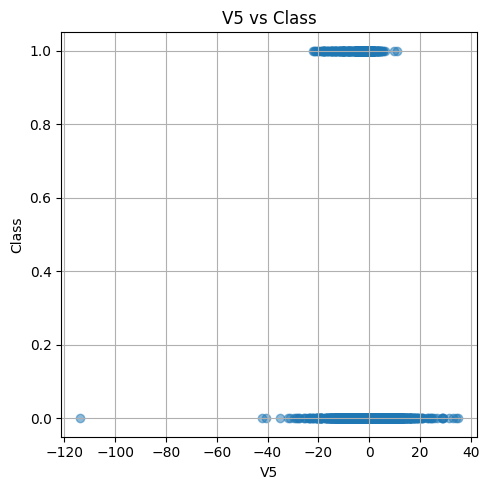

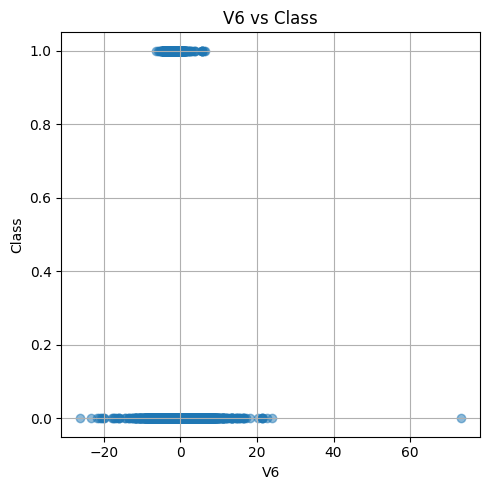

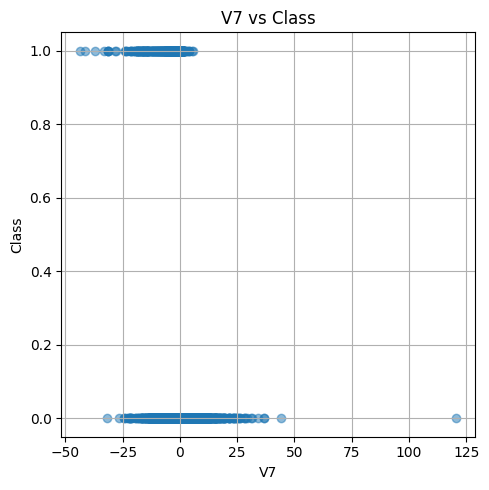

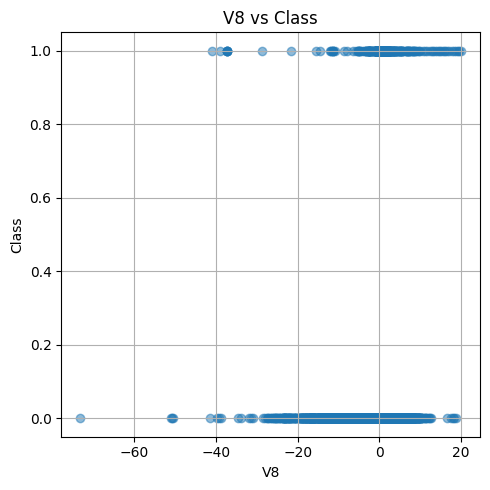

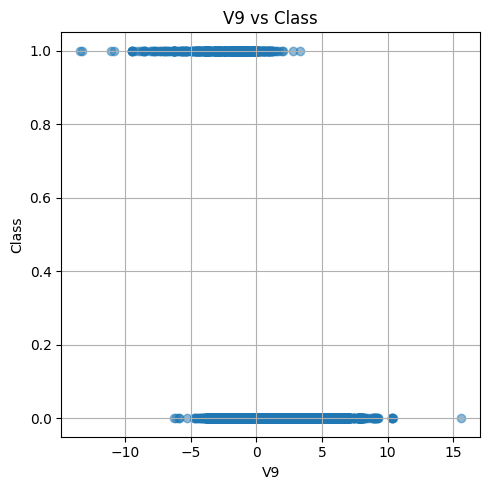

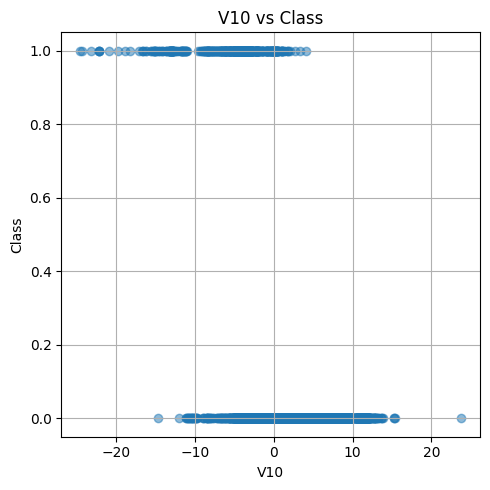

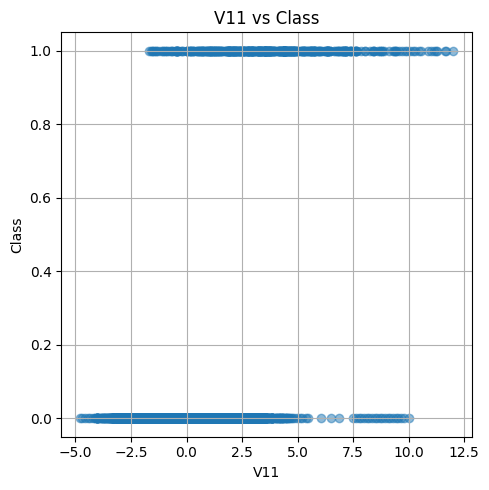

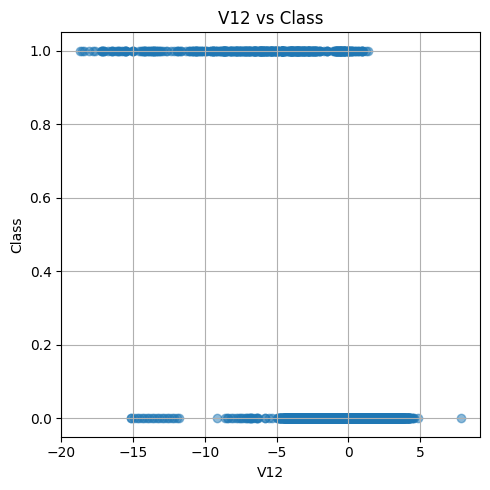

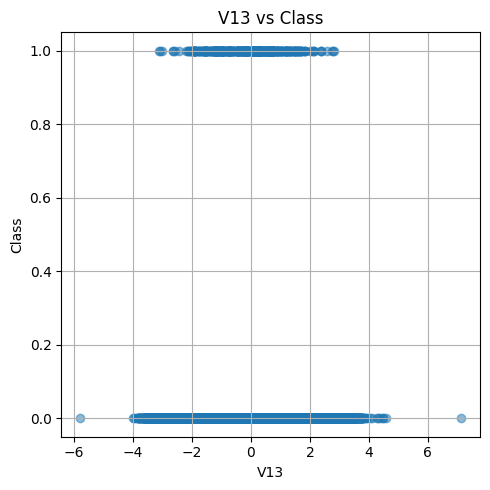

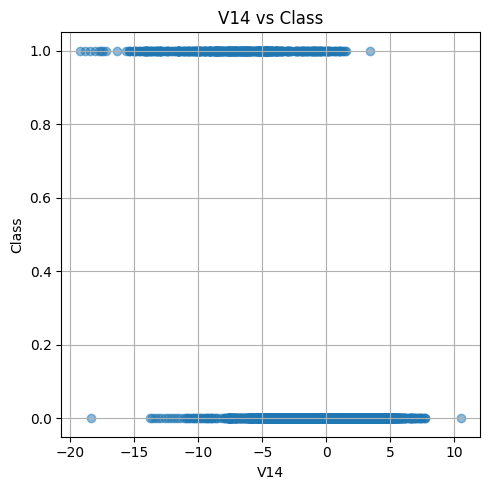

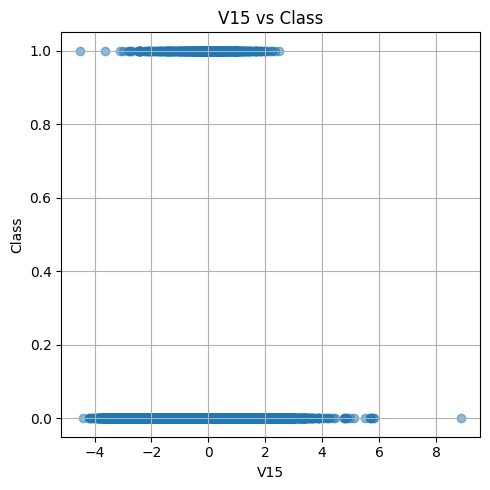

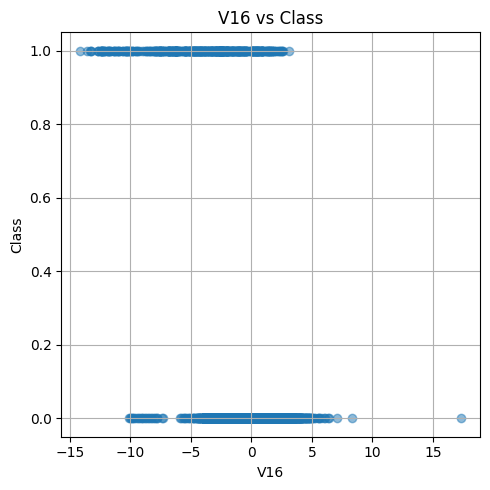

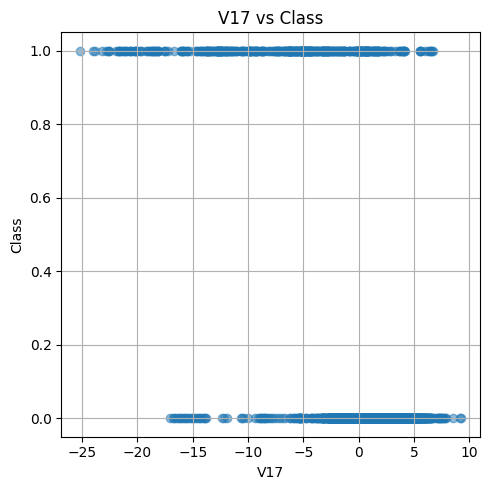

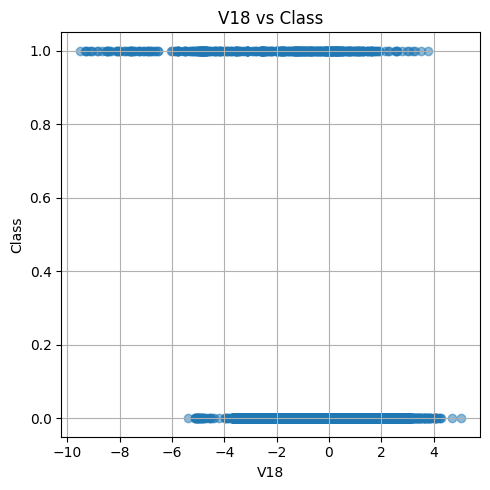

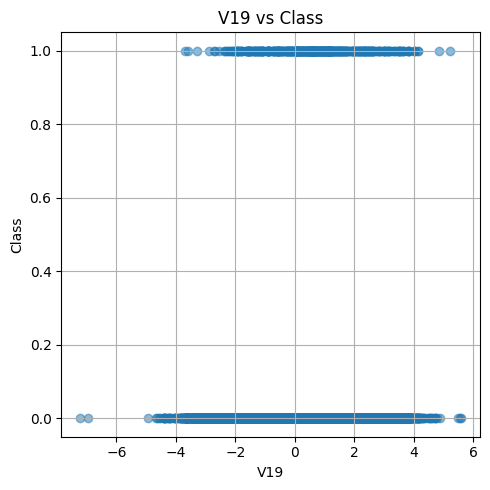

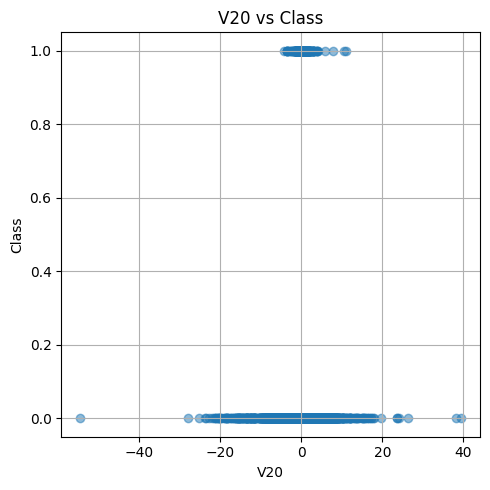

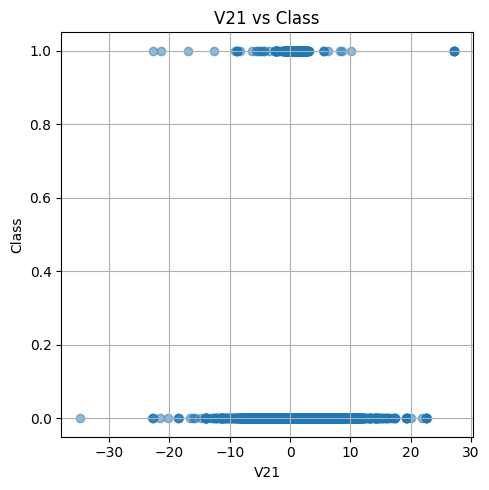

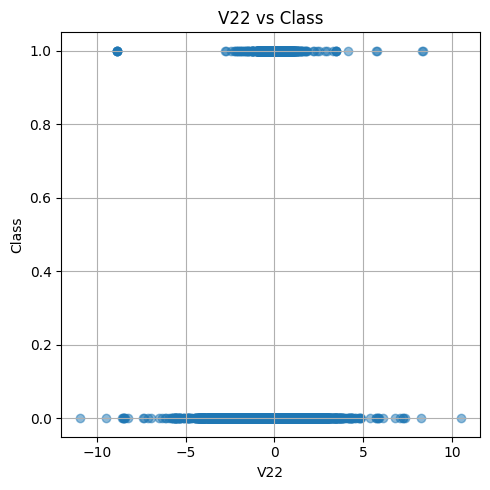

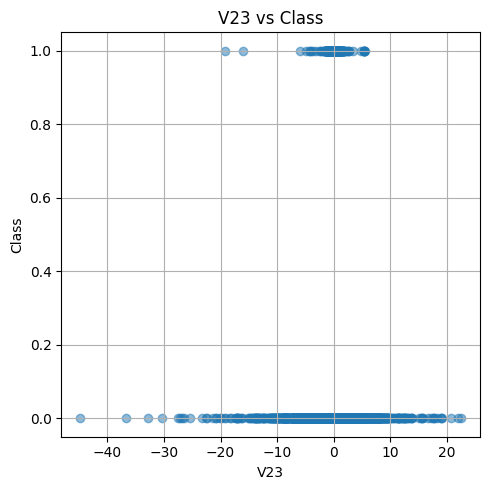

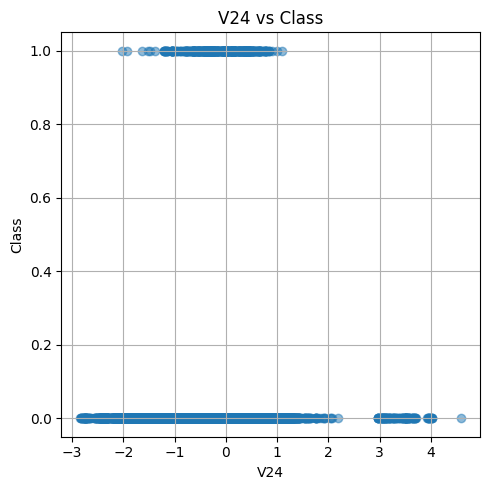

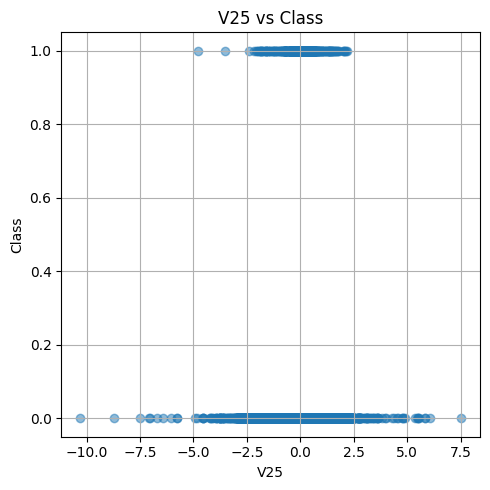

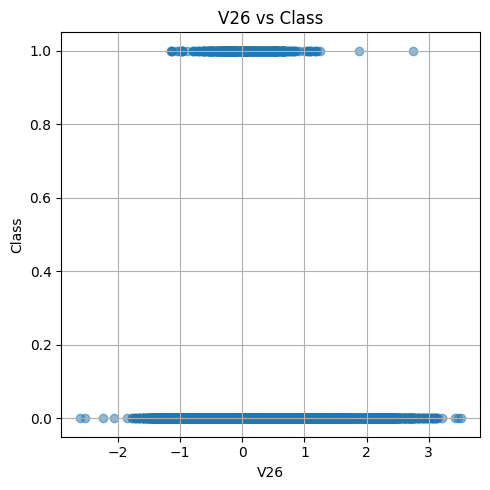

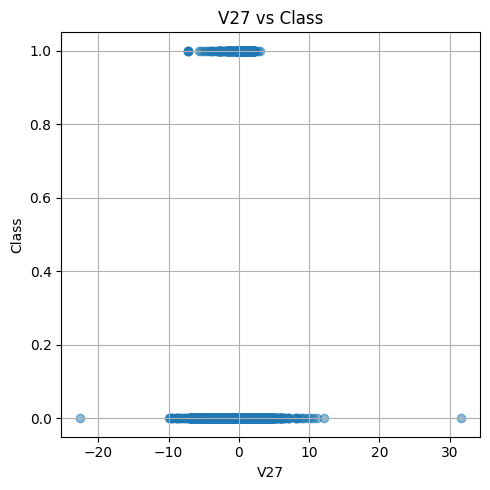

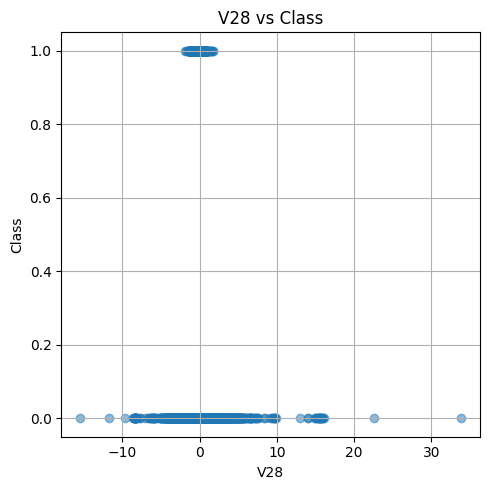

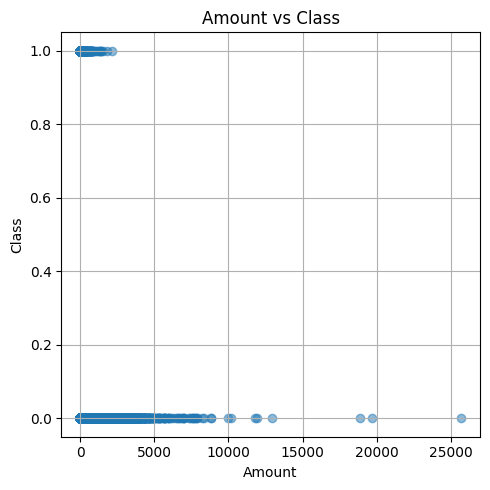

In [7]:
# Exploratory Data Analysis (EDA)

# Viewing the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Checking for missing values and remove that rows
# print(data.dropna)
data.dropna

# Plotting each feature against the Class variable
# Get a list of all features except the target variable
target='Class'
features = [column_name for column_name in data.columns if column_name != target]

# Calculating the mean and standard deviation of input features
feature_stats = data[features].agg(['mean', 'std'])
# print()

# Counting the number of elements in each class
class_counts = data[target].value_counts()

# Printing the results
print("Mean and Standard Deviation of Input Features:")
print(feature_stats)
print("\nNumber of Elements in Each Class:")
print(class_counts)
print()

# Plot each feature against the target variable
for feature in features:
    plt.figure(figsize=(5,5))
    plt.scatter(data[feature], data[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [8]:
# Splitting the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
# Classification Model 1: Decision Tree

dt_classifier = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
# criterion='gini': It specifies the function to measure the quality of a split
# In this case, it uses the Gini impurity measure
# splitter='best': It determines the strategy used to choose the split at each node. Here, it selects the best split
# max_depth=None: It specifies the maximum depth of the tree
# With None provided the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

# train model using X_train and y_train and test model using test set
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_1 = dt_classifier.predict(X_test)
print(y_pred_1)



[1 0 0 ... 0 0 0]


In [10]:
# Classification Model 2: Random Forest

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', random_state=42)
# n_estimators=100: This parameter specifies the number of trees in the forest. Here, 100 decision trees will be created
# max_depth=10: This parameter sets the maximum depth of each tree to 10, limiting the number of levels in each decision tree
# max_features='sqrt': This parameter determines the number of features to consider when looking for the best split
# 'sqrt' means the square root of the total number of features will be used
# random_state=42: It is a random seed to ensure reproducibility of results. Setting this value to 42 ensures the same results for each run


# train model using X_train and y_train and test model using test set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_2 = rf_classifier.predict(X_test)
print(y_pred_2)



[1 0 0 ... 0 0 0]


In [11]:
# Classification Model 3: Gradient Boosting

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
# n_estimators=100: Sets the number of boosting stages to 100, which corresponds to the number of trees in the ensemble.
# learning_rate=0.1: Determines the contribution of each tree to the model
# with a lower value making the model more robust by while taking longer to train
# meaning each tree is a shallow decision tree


# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# train model using X_train and y_train and test model using test set
y_pred_3 = gb_classifier.predict(X_test)
print(y_pred_3)

[1 0 0 ... 0 0 0]


In [12]:
# Classification Model 4: XGBoost

xgb_classifier = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
# max_depth=3: Sets the maximum depth of a tree to 3, which controls the complexity of the individual trees in the ensemble
# learning_rate=0.1: Specifies the step size at each iteration while moving toward a minimum of the loss function
#  influencing the contribution of each tree
# n_estimators=100: Sets the number of boosting rounds or trees in the ensemble to 100

# train model using X_train and y_train and test model using test set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_4 = xgb_classifier.predict(X_test)
print(y_pred_4)




[1 0 0 ... 0 0 0]


               Model  Accuracy  Precision    Recall  F1-score
0      Decision Tree  0.999421   0.842105  0.816327  0.829016
1      Random Forest  0.999508   0.960526  0.744898  0.839080
2  Gradient Boosting  0.999052   0.734043  0.704082  0.718750
3            XGBoost  0.999561   0.939759  0.795918  0.861878

Maximum Accuracy among all models:  XGBoost   0.9995611109160493
Maximum Precision among all models:  Random Forest   0.9605263157894737
Maximum Recall among all models:  Decision Tree   0.8163265306122449
Maximum F1 Score among all models:  XGBoost   0.8618784530386742



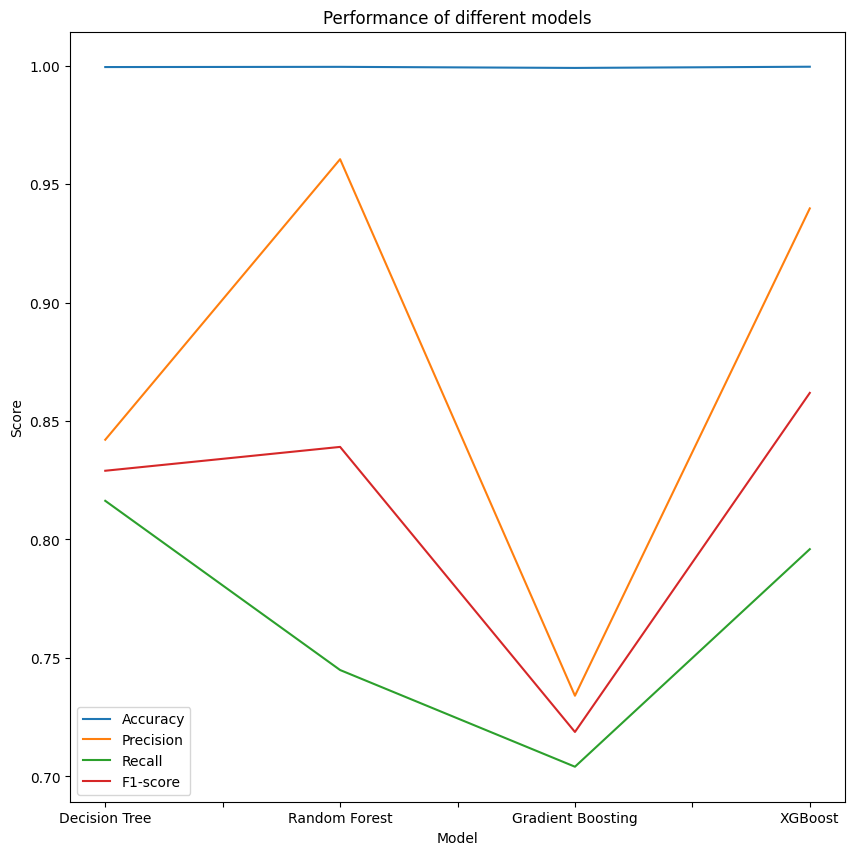

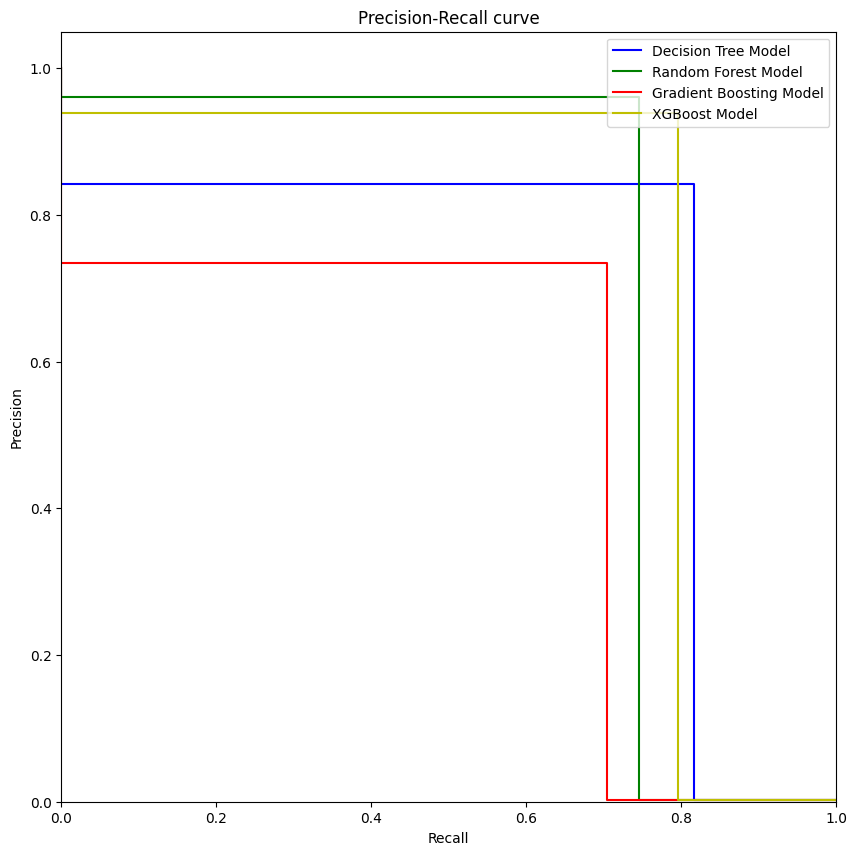


Area Under Curve For Model:

Area Under Precision-Recall Curve for Decision Tree Model: 0.829373896955292
Area Under Precision-Recall Curve for Random Forest Model: 0.8529315820285489
Area Under Precision-Recall Curve for Gradient Boosting Model: 0.7193166485909668
Area Under Precision-Recall Curve for XGBoost Model: 0.8680142573793389


In [13]:
# Evaluation

# Evaluate each classification model using appropriate evaluation metrics as accuracy, precision, recall, F1-score
accuracy_1 = accuracy_score(y_test, y_pred_1) #Accuracy
precision_1 = precision_score(y_test, y_pred_1) #Precision
recall_1 = recall_score(y_test, y_pred_1) #Recall
f1_1 = f1_score(y_test, y_pred_1) #F1 Score

accuracy_2 = accuracy_score(y_test, y_pred_2)#Accuracy
precision_2 = precision_score(y_test, y_pred_2)#Precision
recall_2 = recall_score(y_test, y_pred_2)#Recall
f1_2 = f1_score(y_test, y_pred_2)#F1 Score

accuracy_3 = accuracy_score(y_test, y_pred_3)#Accuracy
precision_3 = precision_score(y_test, y_pred_3)#Precision
recall_3 = recall_score(y_test, y_pred_3)#Recall
f1_3 = f1_score(y_test, y_pred_3)#F1 Score

accuracy_4 = accuracy_score(y_test, y_pred_4)#Accuracy
precision_4 = precision_score(y_test, y_pred_4)#Precision
recall_4 = recall_score(y_test, y_pred_4)#Recall
f1_4 = f1_score(y_test, y_pred_4)#F1 Score

#calculating the accuracy, precision, recall and f1 score of all 4 models

# Create a DataFrame for the metrics
data = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting','XGBoost'],
    'Accuracy': [accuracy_1, accuracy_2, accuracy_3,accuracy_4],
    'Precision': [precision_1, precision_2, precision_3,precision_4,],
    'Recall': [recall_1, recall_2, recall_3,recall_4],
    'F1-score': [f1_1, f1_2, f1_3,f1_4]
}
metrics_df = pd.DataFrame(data)

print(metrics_df)

max_accuracy_model = metrics_df.loc[metrics_df['Accuracy'].idxmax()]['Model']
max_precision_model = metrics_df.loc[metrics_df['Precision'].idxmax()]['Model']
max_recall_model = metrics_df.loc[metrics_df['Recall'].idxmax()]['Model']
max_f1_score_model = metrics_df.loc[metrics_df['F1-score'].idxmax()]['Model']
#here we find the model within all others with maximum values(evaluation metrics)


print()

max_accuracy = metrics_df['Accuracy'].max()
max_precision = metrics_df['Precision'].max()
max_recall = metrics_df['Recall'].max()
max_f1_score = metrics_df['F1-score'].max()
print('Maximum Accuracy among all models: ',max_accuracy_model,' ',max_accuracy)
print('Maximum Precision among all models: ',max_precision_model,' ',max_precision)
print('Maximum Recall among all models: ',max_recall_model,' ',max_recall)
print('Maximum F1 Score among all models: ',max_f1_score_model,' ',max_f1_score)
#here we print out maximum accuracy, precision, recall and f1 score among all models

print()
metrics_df.set_index('Model').plot(kind='line', figsize=(10,10))
plt.title('Performance of different models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()
print()
#line chart of performance of all models

# AUPRC (Area Under the Precision-Recall Curve) curve on the testing set for each model.
###############----##############
# Assuming y_test contains the true labels and y_pred_prob_model1, y_pred_prob_model2, y_pred_prob_model3 contain the predicted probabilities for each model
precision_1, recall_1, _ = precision_recall_curve(y_test, y_pred_1)
precision_2, recall_2, _ = precision_recall_curve(y_test, y_pred_2)
precision_3, recall_3, _ = precision_recall_curve(y_test, y_pred_3)
precision_4, recall_4, _ = precision_recall_curve(y_test, y_pred_4)


plt.figure(figsize=(10, 10))
plt.step(recall_1, precision_1, color='b', where='post', label='Decision Tree Model')
plt.step(recall_2, precision_2, color='g', where='post', label='Random Forest Model')
plt.step(recall_3, precision_3, color='r', where='post', label='Gradient Boosting Model')
plt.step(recall_4, precision_4, color='y', where='post', label='XGBoost Model')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc='upper right')
plt.show()

#plotting the precision recall curve of all models


print()
print("Area Under Curve For Model:")
print()
# Calculate the AUC for each model
auc_1 = auc(recall_1, precision_1)
auc_2 = auc(recall_2, precision_2)
auc_3 = auc(recall_3, precision_3)
auc_4 = auc(recall_4, precision_4)

print('Area Under Precision-Recall Curve for Decision Tree Model:', auc_1)
print('Area Under Precision-Recall Curve for Random Forest Model:', auc_2)
print('Area Under Precision-Recall Curve for Gradient Boosting Model:', auc_3)
print('Area Under Precision-Recall Curve for XGBoost Model:', auc_4)


In [14]:
# Conclusion

# Q1) Based on the evaluation metrics, compare the performance of different models and
# discuss their implications for fraud detection.

# Decision Tree:
# This model has high accuracy and precision indicating that it's effective at
# correctly identifying fraudulent transactions. However, the recall
#  which measures the ability to identify all actual fraudulent transactions, is slightly lower compared to other models

# Random Forest:
# The Random Forest model achieved the highest precision indicating a high proportion of
# correctly identified fraudulent transactions. However, the recall is relatively lower,
# suggesting that the model may miss some fraudulent transactions

# Gradient Boosting:
# The Gradient Boosting model has lower precision and recall compared to the other models
# indicating that it may have more false positive and false negative classifications
# This could result in missed fraudulent transactions and increased false positives

# XGBoost:
# The XGBoost model outperforms the other models in terms of accuracy, precision, and F1-score
# It achieves a good balance between precision and recall, making it effective in identifying
# fraudulent transactions while minimizing false positives and false negatives

# Implications for Fraud Detection:

# The high precision of the Decision Tree and Random Forest models suggests that they are effective
# at accurately identifying fraudulent transactions, but they may miss some fraudulent cases
# as indicated by their lower recall.

# The Gradient Boosting model has lower precision and recall, which could lead to increased false positives and
# missed fraudulent transactions.

# XGBoost stands out as the best-performing model across all evaluation metrics, with high accuracy, precision, recall,
# and F1-score
# This indicates that XGBoost is well-suited for fraud detection, thereby minimizing false positives and false negatives.

# In conclusion, the evaluation metrics suggest that XGBoost is the most suitable model for fraud detection.


# Q2) You need to interpret the results and consider the trade-offs between false positives and
# false negatives in this use case.

# High precision is crucial in fraud detection to minimize false positives(i.e., flagging legitimate transactions as fraudulent)
# as these can cause inconvenience to customers. Random Forest has a good precision but at the cost of lower recall
# potentially missing some fraud cases

# High recall is essential to capture most fraudulent activities and minimize false negatives.

#There is a good balance in XGBoost between precision and recall values making it effective in
# detecting fraud while keeping false negatives low

# Decision Tree performs well in balancing precision and recall considering the AUPRC value.
# However, it has slightly lower precision and recall compared to XGBoost.

#therefore it would be more effective to minimize false negatives to falsely classify frauds(i.e., to catch fraudulent transactions)









